In [64]:
import os
import sys
import pandas as pd
import numpy as np
import ROOT
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

import matplotlib
from matplotlib import pyplot as plt

import dask.dataframe as dd

In [5]:
int(round(1.4,0))

1

In [2]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolated'
name = 'threshold'
WP = '90'

inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_PUWP99_isoQCDrejected.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_PUWP99_isoQCDrejected.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}
    
store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTraining = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfValidation = store_tr[name]
store_tr.close()

In [4]:
df = pd.concat([dfTraining, dfValidation], sort=False)

In [69]:
df_base = df.query('gentau_decayMode>=0 and cl3d_isbestmatch==True and cl3d_pt_c3>=40')
df_pass = df_base.query('cl3d_pubdt_passWP99==True and cl3d_isobdt_passWP10==True')
df_no_pass = df_base.query('cl3d_pubdt_passWP99==True and cl3d_isobdt_passWP10!=True')

In [70]:
df_pass.shape[0]/df_base.shape[0]

0.9275708373129576

In [71]:
df_no_pass.shape[0]/df_base.shape[0]

0.07226997771410379

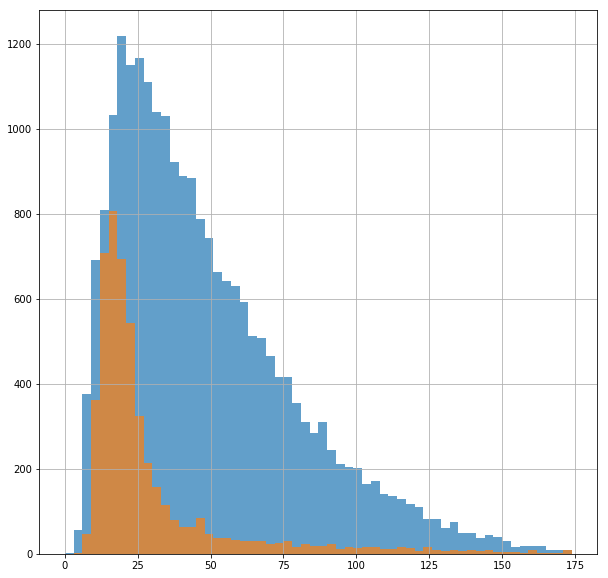

In [52]:
plt.figure(figsize=(10,10))
plt.hist(df_pass['cl3d_pt_c3'], bins=np.arange(0,176,3), alpha=0.7)
plt.hist(df_no_pass['cl3d_pt_c3'], bins=np.arange(0,176,3), alpha=0.7)
#plt.vlines(25,0,10)
plt.grid()
plt.show()

# BIGTREE TAU DM NAMING CONVENTION

In [ ]:
indir = '~/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/bigTrees_examples'
rfile = ROOT.TFile.Open(indir+'/bigTree_Tau_noPu_calotruth/ntuple_1.root')
tree = rfile.Get('hgcalTriggerNtuplizer/HGCalTriggerNtuple')

In [ ]:
tree.GetEvent(3)

for i in range(len(tree.gentau_decayMode)):
    print('DM', tree.gentau_decayMode[i])

print('genpart')
for i in range(len(tree.gen_pdgid)):
    print(tree.gen_pdgid[i])

In [ ]:
a = []
b = []
for j in range(tree.GetEntries()):
    tree.GetEntry(j)
    found=True
    for k in a:
        if tree.gentau_decayMode[0] == k: found=False
    if found: 
        a.append(tree.gentau_decayMode[0])
        b.append(j)
    
print(a)
print(b)

# ISOLATION INSPECTION

In [ ]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolation'
WP = '99'
name = 'threshold'

inFileIsoTau_dict = {
    'threshold'    : indir+'/AllTau_PU200_th_L1candidates_PUWP{0}.hdf5'.format(WP),
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

inFileIsoQCD_dict = {
    'threshold'    : indir+'/QCD_PU200_th_L1candidates_PUWP{0}.hdf5'.format(WP),
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

In [ ]:
store = pd.HDFStore(inFileIsoTau_dict[name], mode='r')
dfIsoTau = store[name]
store.close()

store = pd.HDFStore(inFileIsoQCD_dict[name], mode='r')
dfIsoQCD = store[name]
store.close()

In [ ]:
bins = np.arange(0,50,3)
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.2'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, normed=1, bins=bins)
ax1.hist(dfIsoQCD['etIso_dR0.2'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, normed=1, bins=bins)
fig.show()

In [ ]:
bins = np.arange(0,50,3)
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.2_weighted'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, normed=1, bins=bins)
ax1.hist(dfIsoQCD['etIso_dR0.2_weighted'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, normed=1, bins=bins)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.2'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins)
ax1.hist(dfIsoQCD['etIso_dR0.2'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.2_weighted'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins)
ax1.hist(dfIsoQCD['etIso_dR0.2_weighted'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.3'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins, normed=1)
ax1.hist(dfIsoQCD['etIso_dR0.3'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins, normed=1)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.4'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins, normed=1)
ax1.hist(dfIsoQCD['etIso_dR0.4'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins, normed=1)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.5'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins, normed=1)
ax1.hist(dfIsoQCD['etIso_dR0.5'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins, normed=1)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.6'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins, normed=1)
ax1.hist(dfIsoQCD['etIso_dR0.6'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins, normed=1)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.7'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins, normed=1)
ax1.hist(dfIsoQCD['etIso_dR0.7'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins, normed=1)
fig.show()

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.hist(dfIsoTau['etIso_dR0.8'], label=r'L1 $\tau$', color='blue', histtype='step', lw=2, bins=bins, normed=1)
ax1.hist(dfIsoQCD['etIso_dR0.8'], label=r'L1 QCD jet', color='red', histtype='step', lw=2, bins=bins, normed=1)
fig.show()

In [ ]:
print(len(dfIsoTau['etIso_dR0.8']))
print(len(dfIsoQCD['etIso_dR0.8']))

# TRAINING - VALIDATION

In [56]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/PUrejected_C1fullC2C3_fullPUnoPt'
PUbdtWP = 'WP99'
name = 'threshold'

In [11]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/matched'
PUbdtWP = 'WP99'
name = 'threshold'

In [57]:
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_PUrejected.hdf5'.format(PUbdtWP),
    'mixed'        : indir+'/'
}

inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_matched.hdf5',
    'mixed'        : indir+'/'
}

In [53]:
dfTraining = {}
dfValidation = {}
dfTau_dict = {}

In [58]:
store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTraining[name] = store_tr[name]
store_tr.close()

In [65]:
dfTraining[name]['test1'] = 'HH'
dfTraining[name]['test2'] = 'QCD'

In [72]:
dfTraining[name]['test2']

In [71]:
dfTraining[name].groupby('gentau_decayMode').count()

In [13]:
store_val = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfValidation[name] = store_val[name]
store_val.close()

In [14]:
dfValidation[name].groupby('gentau_decayMode').mean()

,gentau_pt,gentau_eta,gentau_phi,gentau_energy,gentau_mass,gentau_vis_pt,gentau_vis_eta,gentau_vis_phi,gentau_vis_energy,gentau_vis_mass,cl3d_pt,cl3d_eta,cl3d_phi,cl3d_showerlength,cl3d_coreshowerlength,cl3d_firstlayer,cl3d_seetot,cl3d_seemax,cl3d_spptot,cl3d_sppmax,cl3d_szz,cl3d_srrtot,cl3d_srrmax,cl3d_srrmean,cl3d_hoe,cl3d_meanz,deta_cl3d_gentau,dphi_cl3d_gentau,deltar_cl3d_gentau,geom_match,n_matched_cl3d,cl3d_isbestmatch,dataset,genjet_pt,genjet_eta,genjet_phi,genjet_energy,genjet_mass,deta_cl3d_genjet,dphi_cl3d_genjet,deltar_cl3d_genjet,gentau_pid,gentau_vis_abseta,gentau_bin_eta,gentau_bin_pt
gentau_decayMode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-99.9,-99.900000,-99.900000,-99.900000,-99.900000,-99.90000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,6.246150,-0.004341,-0.002936,34.658494,9.850293,1.192677,0.049583,0.079310,0.038615,0.061778,20.898682,0.005973,0.007556,0.003774,0.416619,344.871277,2.793422,1.577405,3.526947,0.000000,0.000000,0.000000,0.828624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,983.000000,-33.000000
-2.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.651186,0.006218,-0.004879,34.802051,9.849116,1.192490,0.049082,0.079049,0.038368,0.061788,21.130917,0.005973,0.007566,0.003746,0.427182,345.205200,0.000000,0.000000,0.000000,0.039806,0.253540,0.008493,3.000000,2.767763,0.000948,0.000055,14.135844,0.417021,2.697639,1.536683,3.408305,0.000000,0.000000,-16.000000,0.000000
-1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.974243,-0.007886,-0.002914,34.596854,9.883671,1.180357,0.050024,0.079812,0.038667,0.061626,20.760315,0.006004,0.007587,0.003810,0.362724,344.562805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,0.000000
0.0,67.430798,-0.040158,0.005586,304.954512,1.77682,37.723273,-0.041430,-0.017164,168.274829,0.229167,27.631781,-0.041284,-0.020313,38.480256,13.676628,1.881537,0.028075,0.066185,0.025410,0.058655,22.742193,0.005195,0.007605,0.003630,9.068113,361.843842,0.018318,0.025552,0.034776,1.000000,1.144077,0.925827,0.913554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.925827,2.252505,6.097118,11.752401
1.0,66.038231,-0.052266,0.024460,296.773698,1.77682,42.079620,-0.052113,0.028012,188.875441,0.921531,33.290810,-0.052410,0.029803,36.146457,13.285827,1.234331,0.026749,0.063004,0.025550,0.057173,18.362129,0.004989,0.007046,0.003859,1.448024,345.858185,0.018420,0.022407,0.032352,1.000000,1.193071,0.906299,0.913543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.906299,2.243815,6.014803,13.195276
10.0,69.653700,-0.002535,-0.000935,305.638556,1.77682,50.459602,-0.003264,-0.000864,221.307038,1.160235,29.532457,-0.002343,0.011082,39.291403,14.737042,1.757901,0.028712,0.065622,0.026781,0.058780,24.811970,0.005446,0.007740,0.003694,4.954125,362.080872,0.018953,0.027947,0.037153,1.000000,1.236410,0.887484,0.920986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.887484,2.228099,5.860303,15.989254
11.0,64.606535,0.037031,0.030038,297.028297,1.77682,50.618635,0.036475,0.029396,233.491313,1.334368,31.924929,0.036619,0.016459,38.373232,14.603917,1.241567,0.028672,0.066016,0.027704,0.059055,22.599398,0.005270,0.007485,0.003900,1.906005,349.911377,0.018436,0.025825,0.035184,1.000000,1.244831,0.883569,0.892274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.883569,2.263928,6.213275,16.052231


In [ ]:
print(len(dfValidation[name].query('cl3d_isbestmatch==True and gentau_decayMode>=0')))
print(len(dfTraining[name].query('cl3d_isbestmatch==True and gentau_decayMode>=0')))

In [ ]:
print(len(dfValidation[name].query('gentau_decayMode==-1')))
print(len(dfTraining[name].query('gentau_decayMode==-1')))

In [ ]:
print(len(dfValidation[name].query('cl3d_isbestmatch==True and gentau_decayMode==-2')))
print(len(dfTraining[name].query('cl3d_isbestmatch==True and gentau_decayMode==-2')))

In [ ]:
dfTau_dict[name] = pd.concat([dfTraining[name],dfValidation[name]],sort=False)

In [ ]:
dfTau_dict[name]#.query('event==1 and dataset==1')

# DUMMY DATAFRAMES TESTS

In [2]:
df1 = pd.DataFrame(columns=['cl3d_a','cl3d_b','cl3d_c','event'],index=[0,1,2,3])
df2 = pd.DataFrame(columns=['cl3d_a','cl3d_b','cl3d_c','event'],index=[0,1,2,3])
df3 = pd.DataFrame(columns=['cl3d_a','cl3d_b','cl3d_c','event'],index=[0,1,2,3])
df4 = pd.DataFrame(columns=['cl3d_a','cl3d_b','cl3d_c','event'],index=[0,1,2,3])

k = 0.1
for j in [0,1,2,3]:
    for i in ['cl3d_a','cl3d_b','cl3d_c']:
        df1[i][j] = k + np.random.normal(0,4)
        k += 1.
        
for j in [0,1,2,3]:
    for i in ['cl3d_a','cl3d_b','cl3d_c']:
        df2[i][j] = k + np.random.normal(0,4)
        k += 1.
        
for j in [0,1,2,3]:
    for i in ['cl3d_a','cl3d_b','cl3d_c']:
        df3[i][j] = k + np.random.normal(0,4)
        k += 1.
        
for j in [0,1,2,3]:
    for i in ['cl3d_a','cl3d_b','cl3d_c']:
        df4[i][j] = k + np.random.normal(0,4)
        k += 1.
    
#df1['event'][0] = 87
#df1['event'][1] = 87
#df1['event'][2] = 91
#df1['event'][3] = 91
#df3['event'][0] = 87
#df3['event'][1] = 87
#df3['event'][2] = 91
#df3['event'][3] = 91

#df2['event'][0] = 23
#df2['event'][1] = 23
#df2['event'][2] = 45
#df2['event'][3] = 45
#df4['event'][0] = 23
#df4['event'][1] = 23
#df4['event'][2] = 45
#df4['event'][3] = 45

#df1['tree_event'] = df1['event']
#df2['tree_event'] = df2['event']
#df3['tree_event'] = df3['event']
#df4['tree_event'] = df4['event']

In [ ]:
#df1.set_index('event', inplace=True)
#df2.set_index('event', inplace=True)
#df3.set_index('event', inplace=True)
#df4.set_index('event', inplace=True)

#df1.reset_index(drop=True, inplace=True)
#df2.reset_index(drop=True, inplace=True)
#df3.reset_index(drop=True, inplace=True)
#df4.reset_index(drop=True, inplace=True)

In [3]:
#df_merged_plus = df1.join(df3, how='left', rsuffix='_cl3d')
#df_merged_minus = df2.join(df4, how='left', rsuffix='_cl3d')

df_merged_plus = pd.concat([df1,df3], sort=False)
df_merged_minus = pd.concat([df2,df4], sort=False)

df_merged = pd.concat([df_merged_plus,df_merged_minus], sort=False)

#df_merged_plus.set_index('event', inplace=True)
#df_merged_minus.set_index('event', inplace=True)

In [4]:
df_merged

,cl3d_a,cl3d_b,cl3d_c,event
0,9.77516,-3.44998,2.97739,NaN
1,6.69358,-3.86302,1.92326,NaN
2,7.12682,1.56655,11.5764,NaN
3,10.5435,6.63637,7.55703,NaN
0,25.1715,22.8458,30.5327,NaN
1,19.3289,27.4811,29.1998,NaN
2,30.9968,29.5983,32.4631,NaN
3,36.1534,38.735,35.051,NaN
0,11.6396,12.4665,18.0779,NaN
1,15.7862,20.2215,19.0929,NaN


In [6]:
df_merged.sort_values('cl3d_a', inplace=True)
df_merged.reset_index(inplace=True)
df_merged

,index,cl3d_a,cl3d_b,cl3d_c,event
0,1,6.69358,-3.86302,1.92326,NaN
1,2,7.12682,1.56655,11.5764,NaN
2,0,9.77516,-3.44998,2.97739,NaN
3,3,10.5435,6.63637,7.55703,NaN
4,0,11.6396,12.4665,18.0779,NaN
5,2,12.3891,24.3267,21.7161,NaN
6,1,15.7862,20.2215,19.0929,NaN
7,3,18.4019,25.9438,27.2018,NaN
8,1,19.3289,27.4811,29.1998,NaN
9,0,25.1715,22.8458,30.5327,NaN


In [8]:
df_merged.groupby('index').tail(2)

,index,cl3d_a,cl3d_b,cl3d_c,event
8,1,19.3289,27.4811,29.1998,NaN
9,0,25.1715,22.8458,30.5327,NaN
10,2,30.9968,29.5983,32.4631,NaN
11,3,36.1534,38.735,35.051,NaN
12,0,37.652,32.9386,42.0804,NaN
13,3,41.7101,49.6891,44.7739,NaN
14,1,43.8024,43.4767,47.2509,NaN
15,2,43.9887,49.819,46.7403,NaN


In [ ]:
df_merged_plus.reset_index(inplace=True)

In [ ]:
df_merged_plus

In [ ]:
df_merged_plus['match'] = False

df_merged_plus.loc[0,'match'] = True
df_merged_plus.loc[1,'match'] = True
df_merged_plus.loc[4,'match'] = True

df_merged_plus.set_index('event', inplace=True)

In [ ]:
df_merged_plus

In [ ]:
temp = df_merged_plus.query('match==True')
group_plus = temp.groupby('event')

In [ ]:
df_merged_plus['n_matched_cl3d'] = group_plus['match'].size()

In [ ]:
df_merged_plus['bestmatch_pt'] = group_plus['cl3d_c'].max()
df_merged_plus['best']  = df_merged_plus['bestmatch_pt'] == df_merged_plus['cl3d_c']

In [ ]:
df_merged_plus

In [ ]:
df_merged_plus['test'] = (df_merged_plus['gen_a'] > 4) & (df_merged_plus['gen_b'] < 10)

In [ ]:
df_merged_plus

In [ ]:
df_merged_plus['test'] = df_merged_plus['test'] * df_merged_plus['gen_b'] < 10

In [ ]:
df_merged_plus

In [ ]:
np.arange(3,0,-1)

In [ ]:
sel_plus    = np.abs(df_merged_plus['cl3d_a']) > 30
sel_minus   = np.abs(df_merged_minus['cl3d_a']) > 30

df_merged_plus  = df_merged_plus[sel_plus]
df_merged_minus = df_merged_minus[sel_minus]

In [ ]:
group_plus  = df_merged_plus.groupby('event')
group_minus = df_merged_minus.groupby('event')

n_cl3d_plus     = group_plus['cl3d_a'].size()
n_cl3d_minus    = group_minus['cl3d_a'].size()

df_merged_plus['n_matched_cl3d']    = n_cl3d_plus
df_merged_minus['n_matched_cl3d']   = n_cl3d_minus

df_merged_plus['bestmatch_pt']  = group_plus['cl3d_a'].max()
df_merged_minus['bestmatch_pt'] = group_minus['cl3d_a'].max()

df_merged_plus['cl3d_isbestmatch']  = df_merged_plus['bestmatch_pt'] == df_merged_plus['cl3d_a']
df_merged_minus['cl3d_isbestmatch'] = df_merged_minus['bestmatch_pt'] == df_merged_minus['cl3d_a']

In [ ]:
df_merged = pd.concat([df_merged_plus, df_merged_minus], sort=False).sort_values("event")

print(df_merged)